In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [232]:
#Generate a list of cites
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

      # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

 # Print the city count to confirm sufficient count
print(cities)       



['tutoia', 'mercedes', 'concordia', 'lorengau', 'bakchar', 'east london', 'long', 'tostamaa', 'albany', 'severo-kurilsk', 'diamantino', 'tilichiki', 'kedrovyy', 'wasilla', 'damietta', 'bol', 'hasaki', 'richards bay', 'houma', 'iquique', 'vaitupu', 'nizhneyansk', 'barentsburg', 'bredasdorp', 'iqaluit', 'cape town', 'nizhniy kuranakh', 'hermanus', 'mount gambier', 'dangara', 'port alfred', 'busselton', 'sinkat', 'maridi', 'palabuhanratu', 'biltine', 'kushmurun', 'tigil', 'chernyshevskiy', 'hobart', 'tasiilaq', 'pisco', 'birin', 'jamestown', 'taolanaro', 'samarai', 'lagoa', 'rikitea', 'awbari', 'airai', 'katsuura', 'atuona', 'victoria', 'dikson', 'port macquarie', 'vandra', 'petrivka', 'khatanga', 'ushuaia', 'hithadhoo', 'gawler', 'kodiak', 'tessalit', 'griffith', 'illoqqortoormiut', 'den helder', 'hilo', 'attawapiskat', 'muros', 'lamu', 'puerto ayora', 'manta', 'butaritari', 'tiksi', 'barrow', 'new glasgow', 'saint george', 'avarua', 'wenzhou', 'westport', 'faya', 'terpezita', 'chalus', 

In [233]:
# base url for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [234]:
record = 0
sets = 1
#creating empty list to store data

city_id = []
city_name = []
country_list = []
lng = []
lat = []
max_temp = []
humidity = []
wind_speed = []
cloud = []
date_list = []


#loop through cites and use except to handle erros

count = 0
for city in cities:
     response_json = requests.get(query_url + city).json()
     #print(response_json)
     try:
          print(f"Processing Record {record} of set {sets} | {city}")
          city_id.append(response_json["sys"]["id"])
          city_name.append(city)
          country_list.append(response_json["sys"]["country"])
          date_list.append(response_json['dt'])   
          lng.append(response_json["coord"]["lon"])
          lat.append(response_json["coord"]["lat"])
          max_temp.append(response_json["main"]["temp_max"])
          humidity.append(response_json["main"]["humidity"])
          cloud.append(response_json["clouds"]["all"])
          wind_speed.append(response_json["wind"]["speed"])
     except:
          print(f"city not found. Skipping {city}.")      

print(f"City Name: {cities}, City ID: {city_id}")
    
   
  

 


    #  try:
    #      city_id = response_json["id"]
    #      city_name = response_json["name"]






Processing Record 0 of set 1 | fortuna
Processing Record 0 of set 1 | somerset east
city not found. Skipping somerset east.
Processing Record 0 of set 1 | parksepa
Processing Record 0 of set 1 | umba
city not found. Skipping umba.
Processing Record 0 of set 1 | saleaula
city not found. Skipping saleaula.
Processing Record 0 of set 1 | leh
city not found. Skipping leh.
Processing Record 0 of set 1 | tvoroyri
Processing Record 0 of set 1 | morondava
city not found. Skipping morondava.
Processing Record 0 of set 1 | dombas
city not found. Skipping dombas.
Processing Record 0 of set 1 | assiniboia
Processing Record 0 of set 1 | la ronge
Processing Record 0 of set 1 | farmington
Processing Record 0 of set 1 | yarada
Processing Record 0 of set 1 | tamboril
Processing Record 0 of set 1 | shahpura
Processing Record 0 of set 1 | geraldton
Processing Record 0 of set 1 | giddalur
city not found. Skipping giddalur.
Processing Record 0 of set 1 | soresina
Processing Record 0 of set 1 | grand centr

In [235]:
#converting data into a dataFrame

weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloud,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mercedes,0,AR,1616376191,81,-34.6515,-59.4307,64.00,1.99
1,concordia,0,AR,1616375935,97,-31.3930,-58.0209,66.99,1.99
2,long,20,TH,1616376192,61,18.0761,99.8326,86.00,3.44
3,albany,0,US,1616375995,31,42.6001,-73.9662,46.99,1.86
4,kedrovyy,40,RU,1616376194,93,56.1667,91.8167,33.80,8.95


In [236]:
weather_df.to_csv("../output_data/cities.csv", index = False)
  

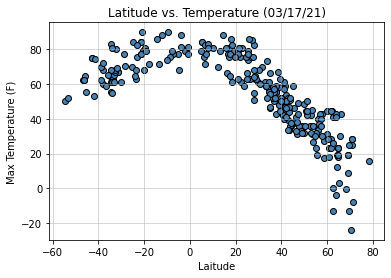

In [237]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Temperature (03/17/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/Latitude vs Max Temperature.png")

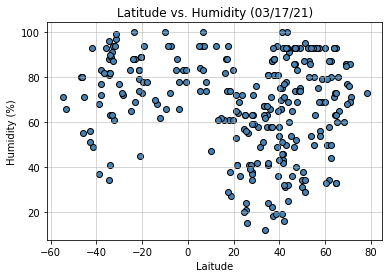

In [238]:
#plot for Latitude vs. Humidity 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity (03/17/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/Latitude vs Humidity.png")

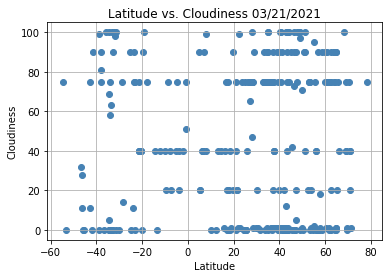

In [239]:
 #Building a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", marker="o")

# This will Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

# Show plot
plt.show()

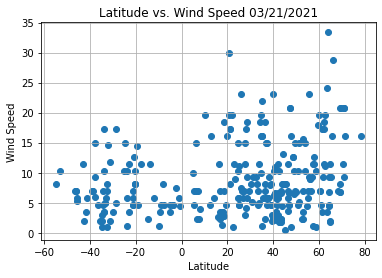

In [240]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [241]:
#dataframe for hemisphere
mask = weather_df['Lat'] > 0
northern_hemisphere = weather_df[mask]
southern_hemisphere = weather_df[~mask]


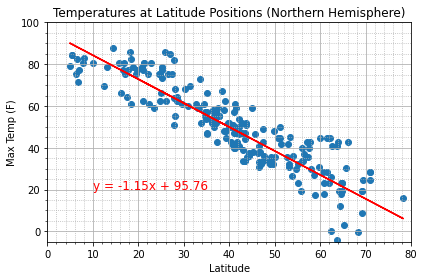

In [242]:
#plotting North 
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


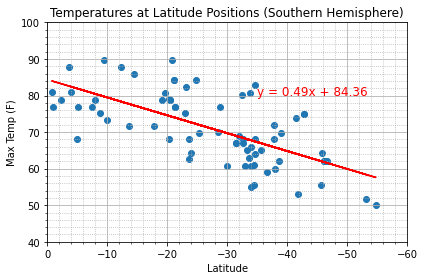

In [243]:
#plotting south
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


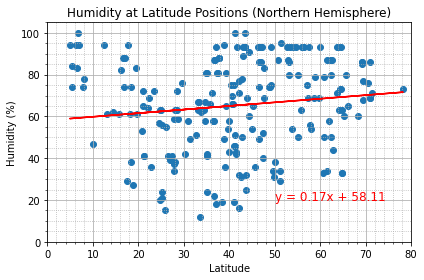

In [244]:
#plot northern humidity
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


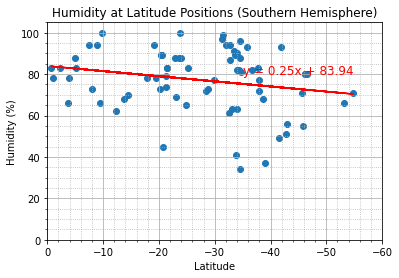

In [245]:
#plotting sourthen humidity 
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()


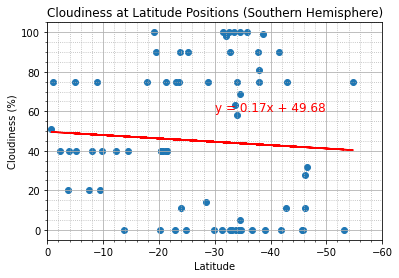

In [246]:
#south clouds plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()


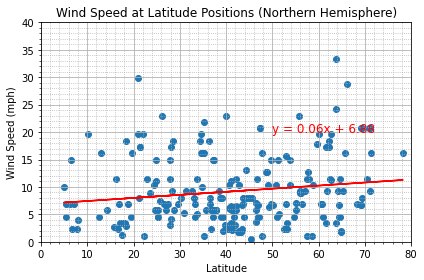

In [247]:
#northern windspeed plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


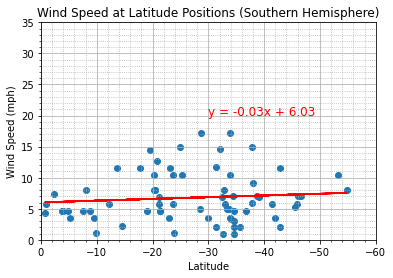

In [248]:
#southern wind speed plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
